In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
from sklearn import svm

Data1 = scio.loadmat('data_sets/ex6data1.mat')
x1 = Data1['X']
y1 = Data1['y']
print('x1.shape:', x1.shape)
print('y1.shape:', y1.shape)

y1 = y1.flatten()
print('y1.flatten.shape:', y1.shape)

x1.shape: (51, 2)
y1.shape: (51, 1)
y1.flatten.shape: (51,)


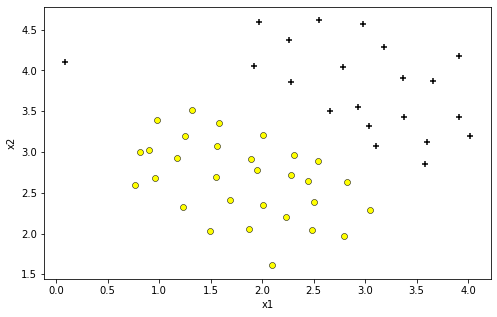

In [18]:
def plot_data(x, y):
    p = x[y == 1]
    n = x[y == 0]
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.scatter(p[:, 0], p[:, 1], c = 'k', marker = '+', label = 'positive examples')
    plt.scatter(n[:, 0], n[:, 1], c = 'yellow', marker = 'o', edgecolor = 'k', linewidths = 0.5 ,label = 'negative examples')
    
plt.figure(0, figsize = (8,5))
plot_data(x1, y1)
plt.show()

In [19]:
clf_1 = svm.SVC(C = 1, kernel = 'linear', gamma = 'auto')
print(clf_1.fit(x1, y1))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [20]:
print(clf_1.predict([[3.5, 3]]))

[1]


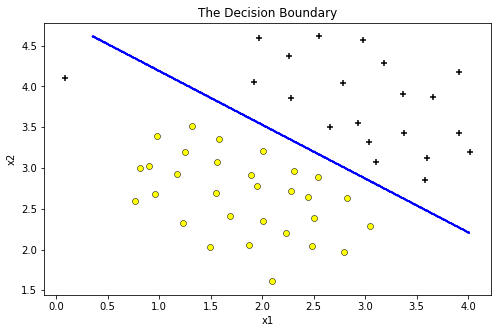

In [21]:
def plot_boundary(clf, x):
    u = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 500)
    v = np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 500)
    x_, y_ = np.meshgrid(u, v)
    t = np.column_stack((x_.flatten(), y_.flatten()))
    z = clf.predict(t)
    z = z.reshape(x_.shape)
    plt.contour(x_, y_, z, colors = 'b')
    plt.title('The Decision Boundary')    

plt.figure(1, figsize = (8,5))
plot_data(x1, y1)
plot_boundary(clf_1, x1)
plt.show()

In [22]:
models = [svm.SVC(C, kernel = 'linear') for C in [1, 100]]
clfs = [model.fit(x1, y1) for model in models]

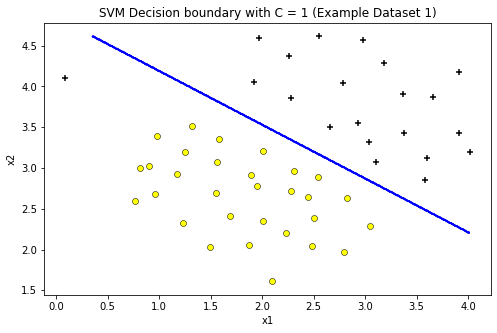

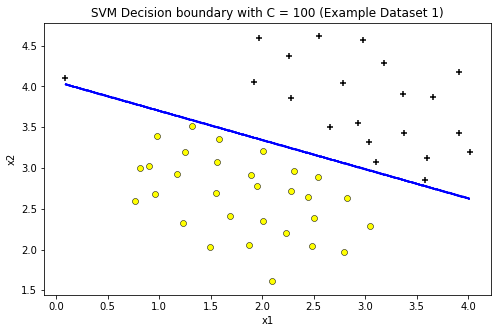

In [23]:
title = ['SVM Decision boundary with C = {} (Example Dataset 1)'.format(C) for C in [1, 100]]
for model, title in zip(clfs, title):
    plt.figure(figsize = (8, 5))
    plot_data(x1, y1)
    plot_boundary(model, x1)
    plt.title(title)

In [24]:
'''
SVM with Gaussian Kernels
'''
def gaussion_kernel(x1, x2, sigma):
    return np.exp( - np.power(x1 - x2, 2).sum() / (2 * sigma**2))

In [25]:
a1 = np.array([1, 2, 1])
a2 = np.array([0, 4, -1])
sigma = 2
print(gaussion_kernel(a1, a2, sigma))

0.32465246735834974


In [26]:
'''
Example Dataset 2
'''
Data2 = scio.loadmat('data_sets/ex6data2.mat')
x2 = Data2['X']
y2 = Data2['y']
print('x2.shape:', x2.shape)
print('y2.shape:', y2.shape)

y2 = y2.flatten()
print('y2.flatten().shape:', y2.shape)

x2.shape: (863, 2)
y2.shape: (863, 1)
y2.flatten().shape: (863,)


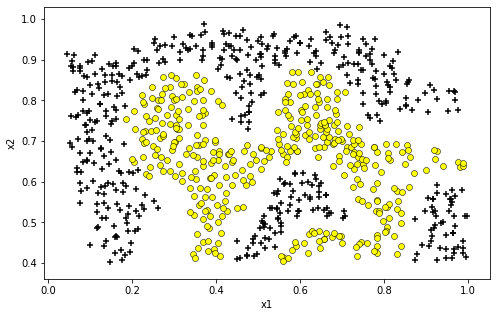

In [27]:
plt.figure(figsize = (8,5))
plot_data(x2, y2)
plt.show()

In [28]:
clf_2 = svm.SVC(C = 1, kernel = 'rbf', gamma = np.power(0.1, -2) / 2) # gamma = 1 / (2 * sigma**2)
clf_2.fit(x2, y2)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

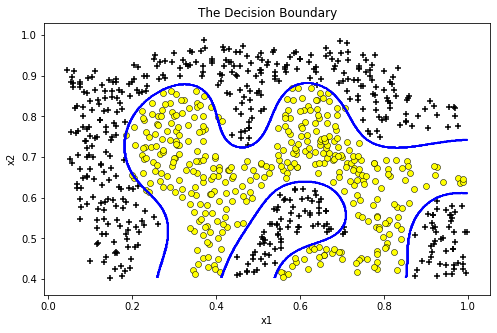

In [30]:
plt.figure(figsize = (8 ,5))
plot_data(x2, y2)
plot_boundary(clf_2, x2)
plt.show()

In [35]:
'''
Example Dataset 3
Your task is to use the cross validation set Xval, yval to 
determine the best C and σ parameter to use.
'''
Data3 = scio.loadmat('data_sets/ex6data3.mat')
x3 = Data3['X']
y3 = Data3['y']
x3_val = Data3['Xval']
y3_val = Data3['yval']
y3 = y3.flatten()
y3_val = y3_val.flatten()
print('x3.shape:', x3.shape)
print('y3.shape:', y3.shape)
print('x3_val.shape:', x3_val.shape)
print('y3_val.shape:', y3_val.shape)

x3.shape: (211, 2)
y3.shape: (211,)
x3_val.shape: (200, 2)
y3_val.shape: (200,)


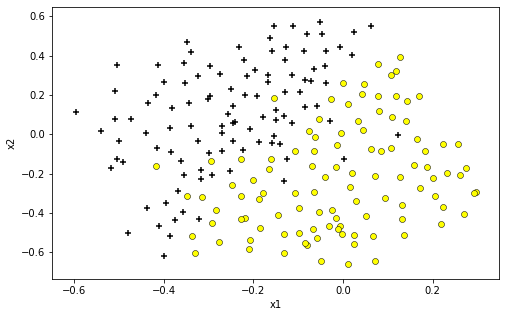

In [33]:
plt.figure(figsize = (8, 5))
plot_data(x3, y3)
plt.show()

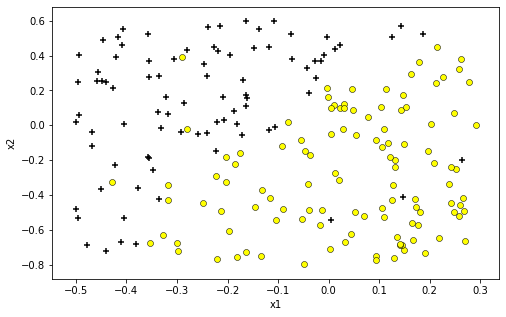

In [36]:
plt.figure(figsize = (8, 5))
plot_data(x3_val, y3_val)
plt.show()

In [45]:
try_value = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])

def error_rate(y_predict, y_val):
    m = y_val.size
    count = 0
    for i in range(m):
        count = count + np.abs(int(y_predict[i]) - int(y_val[i]))
    return count / m

def parameters_select(try_value, x3, y3, x3_val, y3_val):
    error = 1
    c = 1
    sigma = 0.01
    m = len(try_value)
    for i in range(m):
        for j in range(m):
            clf = svm.SVC(C = try_value[i], kernel = 'rbf', 
                          gamma = np.power(try_value[j], -2)/2)
            clf.fit(x3, y3)
            y_predict = clf.predict(x3_val)
            error_temp = error_rate(y_predict, y3_val)
            if error > error_temp:
                error = error_temp
                c = try_value[i]
                sigma = try_value[j]
    return c, sigma, error

c, sigma, error = parameters_select(try_value, x3, y3, x3_val, y3_val)
print('the best C and σ parameter is {0} and {1}, which minimizes error rate that is {2}'.format(c, sigma, error))

the best C and σ parameter is 1.0 and 0.1, which minimizes error rate that is 0.035


In [46]:
clf_3 = svm.SVC(C = c, kernel = 'rbf', gamma = np.power(sigma, -2)/2)
clf_3.fit(x3, y3)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

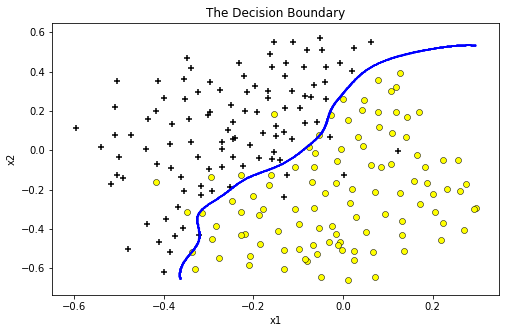

In [47]:
plt.figure(figsize = (8, 5))
plot_data(x3, y3)
plot_boundary(clf_3, x3)
plt.show()

In [87]:
'''
Spam Classification
You will be training a classiﬁer to classify whether a given email, x, is spam (y = 1) or non-spam (y = 0). 
In particular, you need to convert each email into a feature vector x ∈ Rn. 
The complete vocabulary list is in the ﬁle vocab.txt
Your task now is to complete the code in processEmail.m to perform this mapping. 
'''

with open('data_sets/emailSample1.txt', 'r') as f:
    email_sample = f.read()
print(email_sample)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




In [112]:
'''
Preprocessing Emails
'''

import re # regular expression operations
import nltk # natural language tool kit

def process_email(email):
    '''
    Lower-casing
    Stripping HTML
    Normalizing URLs
    Normalizing Email Addresses
    Normalizing Numbers
    Normalizing Dollars
    Word Stemming
    Removal of non-words
    '''
    email = email.lower() # Lower-casing
    email = re.sub(r'<[^<>]+>', ' ', email)
    email = re.sub(r'(http|https)://[^\s]*', 'httpaddr', email)
    email = re.sub(r'[^\s]+@[^\s]+', 'emailaddr', email)
    email = re.sub(r'\d+', 'number', email)
    email = re.sub(r'[$]+', 'dollar', email)
    
    stemmer = nltk.stem.PorterStemmer() # use the porter algorithem
    tokens = re.split(r'[ @$/#.-:&*+=\[\]?!()\{\},\'\">_<;%]', email)
    tokenlist = []
    for token in tokens:
        token = re.sub(r'[^a-zA-Z]', '', token)
        try: # 'porterStemmer' sometimes goes wrong, so use a 'try...except...'
            token = stemmer.stem(token) # 词根
        except:
            token = ''
        if len(token) < 1:
            continue # if the length of one string is less than one, don't put it into tokenlist
        tokenlist.append(token)
        
    return tokenlist

email_list = process_email(email_sample)
print(email_list)

['anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a', 'web', 'portal', 'well', 'it', 'depend', 'on', 'how', 'mani', 'visitor', 'you', 're', 'expect', 'thi', 'can', 'be', 'anywher', 'from', 'less', 'than', 'number', 'buck', 'a', 'month', 'to', 'a', 'coupl', 'of', 'dollarnumb', 'you', 'should', 'checkout', 'httpaddr', 'or', 'perhap', 'amazon', 'ecnumb', 'if', 'your', 'run', 'someth', 'big', 'to', 'unsubscrib', 'yourself', 'from', 'thi', 'mail', 'list', 'send', 'an', 'email', 'to', 'emailaddr']


In [113]:
'''
Vocabulary List
'''
vocab_list = np.loadtxt('data_sets/vocab.txt', dtype = 'str')
print(vocab_list)

[['1' 'aa']
 ['2' 'ab']
 ['3' 'abil']
 ...
 ['1897' 'zdnet']
 ['1898' 'zero']
 ['1899' 'zip']]


In [114]:
def map_word_indices(word_list, vocab_list):    
    '''
    map each word in the preprocessed email into a list of word indices 
    that contains the index of the word in the vocabulary list.
    '''
    word_indices = []
    for i in range(len(word_list)):
        for j in range(len(vocab_list)):
            if word_list[i] == vocab_list[j, 1]:
                word_indices.append(j + 1)
                break
    return word_indices

word_indices = map_word_indices(email_list, vocab_list)
print('word_indices:\n', word_indices)

word_indices:
 [86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1893, 1364, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]


In [120]:
'''
Extracting Features from Emails
You will now implement the feature extraction 
that converts each email into a vector in Rn. 
'''
def extract_features(indices):
    features = np.zeros((1899))
    for each in indices:
        features[each - 1] = 1
    return features

print('The sum of non-zero entries is:', sum(extract_features(word_indices)))

The sum of non-zero entries is: 45.0


In [125]:
'''
Training SVM for Spam Classification
'''
Train_example = scio.loadmat('data_sets/spamTrain.mat')
Test_example = scio.loadmat('data_sets/spamTest.mat')

x_train = Train_example['X']
y_train = Train_example['y']
x_test = Test_example['Xtest']
y_test = Test_example['ytest']

y_train = y_train.flatten()
y_test = y_test.flatten()

print('x_train.shape:{0},y_train.shape:{1}\nx_test.shape:{2},y_test.shape:{3}'
     .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train.shape:(4000, 1899),y_train.shape:(4000,)
x_test.shape:(1000, 1899),y_test.shape:(1000,)


In [135]:
clf_4 = svm.SVC(C = 0.1, kernel = 'linear', gamma = 'auto')
clf_4.fit(x_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [143]:
def accuracy(y_predict, y):
    count = 0
    m = len(y)
    for i in range(m):
        if y_predict[i] == y[i]:
            count += 1
    return count/m

y_train_predict = clf_4.predict(x_train)
y_test_predict = clf_4.predict(x_test)
train_accuracy = accuracy(y_predict, y_train)
test_accuracy = accuracy(y_test_predict, y_test)
print('The training accuracy is {0:0.1f}%, and the test accuracy is {1}%'.
      format(train_accuracy * 100, test_accuracy * 100))

The training accuracy is 99.8%, and the test accuracy is 98.9%


In [164]:
'''
Top Predictors for Spam
'''
coef_list = clf_4.coef_ # This is only available in the case of a linear kernel.
print(coef_list.shape)
for i in range(15):
    index = np.argsort(- (coef_list.flatten()))[i]
    print('{0} {1:0.4f}\n'.format(vocab_list[index, 1], coef_list[0, index]))

(1, 1899)
our 0.5006

click 0.4659

remov 0.4229

guarante 0.3836

visit 0.3677

basenumb 0.3451

dollar 0.3236

will 0.2697

price 0.2673

pleas 0.2612

most 0.2573

nbsp 0.2539

lo 0.2535

ga 0.2483

hour 0.2464



In [168]:
'''
Optional exercise: Try your own emails
'''
with open('data_sets/emailSample2.txt', 'r') as f1:
    email_sample_2 = f1.read()

with open('data_sets/spamSample2.txt', 'r') as f2:
    spam_sample_2 = f2.read()
    
print('email example:\n', email_sample_2)
print('spam example:\n', spam_sample_2)

email example:
 Folks,
 
my first time posting - have a bit of Unix experience, but am new to Linux.

 
Just got a new PC at home - Dell box with Windows XP. Added a second hard disk
for Linux. Partitioned the disk and have installed Suse 7.2 from CD, which went
fine except it didn't pick up my monitor.
 
I have a Dell branded E151FPp 15" LCD flat panel monitor and a nVidia GeForce4
Ti4200 video card, both of which are probably too new to feature in Suse's default
set. I downloaded a driver from the nVidia website and installed it using RPM.
Then I ran Sax2 (as was recommended in some postings I found on the net), but
it still doesn't feature my video card in the available list. What next?
 
Another problem. I have a Dell branded keyboard and if I hit Caps-Lock twice,
the whole machine crashes (in Linux, not Windows) - even the on/off switch is
inactive, leaving me to reach for the power cable instead.
 
If anyone can help me in any way with these probs., I'd be really grateful -
I've 

In [175]:
email_2 = process_email(email_sample_2)
spam_2 = process_email(spam_sample_2)

print(email_2)
print(spam_2)

['folk', 'my', 'first', 'time', 'post', 'have', 'a', 'bit', 'of', 'unix', 'experi', 'but', 'am', 'new', 'to', 'linux', 'just', 'got', 'a', 'new', 'pc', 'at', 'home', 'dell', 'box', 'with', 'window', 'xp', 'ad', 'a', 'second', 'hard', 'diskfor', 'linux', 'partit', 'the', 'disk', 'and', 'have', 'instal', 'suse', 'number', 'number', 'from', 'cd', 'which', 'wentfin', 'except', 'it', 'didn', 't', 'pick', 'up', 'my', 'monitor', 'i', 'have', 'a', 'dell', 'brand', 'enumberfpp', 'number', 'lcd', 'flat', 'panel', 'monitor', 'and', 'a', 'nvidia', 'geforcenumbertinumb', 'video', 'card', 'both', 'of', 'which', 'are', 'probabl', 'too', 'new', 'to', 'featur', 'in', 'suse', 's', 'defaultset', 'i', 'download', 'a', 'driver', 'from', 'the', 'nvidia', 'websit', 'and', 'instal', 'it', 'use', 'rpm', 'then', 'i', 'ran', 'saxnumb', 'as', 'wa', 'recommend', 'in', 'some', 'post', 'i', 'found', 'on', 'the', 'net', 'butit', 'still', 'doesn', 't', 'featur', 'my', 'video', 'card', 'in', 'the', 'avail', 'list', 'wh

In [176]:
email_indices_2 = map_word_indices(email_2, vocab_list)
spam_indices_2 = map_word_indices(spam_2, vocab_list)

print(email_indices_2)
print(spam_indices_2)

[662, 1084, 652, 1694, 1280, 756, 186, 1162, 1752, 594, 225, 64, 1099, 1699, 960, 902, 726, 1099, 1228, 124, 787, 427, 208, 1860, 1855, 1885, 21, 1464, 752, 960, 1217, 1666, 464, 74, 756, 847, 1627, 1120, 1120, 688, 259, 1840, 583, 883, 450, 1249, 1760, 1084, 1061, 756, 427, 210, 1120, 1208, 1061, 74, 1792, 246, 204, 1162, 1840, 1308, 1708, 1099, 1699, 626, 825, 1627, 487, 492, 688, 1666, 1824, 74, 847, 883, 1437, 1671, 116, 1803, 1376, 825, 1545, 1280, 677, 1171, 1666, 1095, 1590, 476, 626, 1084, 1792, 246, 825, 1666, 139, 961, 1835, 1101, 80, 1309, 756, 427, 210, 909, 74, 810, 785, 1666, 1845, 988, 380, 825, 960, 1113, 1855, 571, 1666, 1171, 1163, 1630, 940, 1018, 1699, 1365, 666, 1666, 1284, 230, 850, 810, 86, 238, 771, 1018, 825, 75, 1860, 1675, 162, 1371, 1785, 1462, 1666, 1095, 225, 756, 1440, 1192, 1162, 805, 1182, 1510, 162, 718, 666, 452, 1790, 1162, 960, 1613, 116, 1379, 1664, 980, 876, 960, 1773, 735, 666, 1744, 1610, 840, 961, 995, 531]
[176, 707, 1120, 479, 681, 460, 1711,

In [184]:
email_2 = extract_features(email_indices_2)
spam_2 = extract_features(spam_indices_2)

print(email_2.shape)
print(spam_2.shape)

email_2 = np.matrix(email_2)
spam_2 = np.matrix(spam_2)

print(email_2.shape)
print(spam_2.shape)

(1899,)
(1899,)
(1, 1899)
(1, 1899)


In [185]:
y_email_pred = clf_4.predict(email_2)
y_spam_pred = clf_4.predict(spam_2)

print(y_email_pred, y_spam_pred)

[0] [1]
